# Homework 6, Part One: Lots and lots of questions about beer

### Do your importing and your setup

In [2]:
#!ls
import pandas as pd

%matplotlib inline


## Read in the file `craftcans.csv`, and look at the first first rows

In [4]:
df = pd.read_csv("craftcans.csv")
df.head()

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.50%,50
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.90%,26
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.80%,19
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.00%,38
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.00%,25


## How many rows do you have in the data? What are the column types?

In [5]:
df.shape

(2416, 7)

In [8]:
df.dtypes

Beer        object
Brewery     object
Location    object
Style       object
Size        object
ABV         object
IBUs        object
dtype: object

# Checking out our alcohol

## What are the top 10 producers of cans of beer?

In [10]:
df.Brewery.value_counts().head(10)

Brewery Vivant                62
Oskar Blues Brewery           46
Sun King Brewing Company      38
Cigar City Brewing Company    25
Sixpoint Craft Ales           24
Hopworks Urban Brewery        23
Stevens Point Brewery         22
Great Crescent Brewery        20
21st Amendment Brewery        20
SanTan Brewing Company        19
Name: Brewery, dtype: int64

## What is the most common ABV? (alcohol by volume)

In [13]:
df.ABV.value_counts().head(1)

5.00%    215
Name: ABV, dtype: int64

## Oh, weird, ABV isn't a number. Convert it to a number for me, please.

It's going to take a few steps!

### First, let's just look at the ABV column by itself

In [14]:
df.ABV

0        4.50%
1        4.90%
2        4.80%
3        6.00%
4        6.00%
5        5.60%
6        8.00%
7       12.50%
8        7.70%
9        4.20%
10       5.00%
11       6.60%
12       4.00%
13       5.50%
14       7.60%
15       5.10%
16       6.50%
17       6.00%
18       5.00%
19       5.20%
20       4.80%
21       7.20%
22       6.70%
23       4.90%
24       8.00%
25       7.50%
26       6.00%
27       8.00%
28       6.30%
29       5.80%
         ...  
2386     5.70%
2387     6.20%
2388     4.90%
2389     9.90%
2390     6.20%
2391     5.80%
2392     5.20%
2393     8.50%
2394     7.00%
2395     5.30%
2396     5.60%
2397     4.90%
2398     5.10%
2399     4.00%
2400     5.50%
2401     5.10%
2402     5.10%
2403     9.70%
2404     5.10%
2405     6.70%
2406     6.20%
2407     8.30%
2408     7.00%
2409     4.90%
2410     9.90%
2411     5.30%
2412     9.90%
2413     8.00%
2414     8.70%
2415     6.50%
Name: ABV, Length: 2416, dtype: object

### Hm, `%` isn't part of  a number. Let's remove it.

When you're confident you got it right, save the results back into the `ABV` column.

- *Tip: In programming the easiest way to remove something is to *replacing it with nothing*.
- *Tip: "nothing" might seem like `NaN` sinc we talked about it a lot in class, but in this case it isn't! It's just an empty string, like ""*
- *Tip: `.replace` is used for replacing ENTIRE cells, while `.str.replace` is useful for replacing PARTS of cells (see my New York example)*

In [18]:
df['ABV'] = df.ABV.str.replace('%', '')
df['ABV']

0        4.50
1        4.90
2        4.80
3        6.00
4        6.00
5        5.60
6        8.00
7       12.50
8        7.70
9        4.20
10       5.00
11       6.60
12       4.00
13       5.50
14       7.60
15       5.10
16       6.50
17       6.00
18       5.00
19       5.20
20       4.80
21       7.20
22       6.70
23       4.90
24       8.00
25       7.50
26       6.00
27       8.00
28       6.30
29       5.80
        ...  
2386     5.70
2387     6.20
2388     4.90
2389     9.90
2390     6.20
2391     5.80
2392     5.20
2393     8.50
2394     7.00
2395     5.30
2396     5.60
2397     4.90
2398     5.10
2399     4.00
2400     5.50
2401     5.10
2402     5.10
2403     9.70
2404     5.10
2405     6.70
2406     6.20
2407     8.30
2408     7.00
2409     4.90
2410     9.90
2411     5.30
2412     9.90
2413     8.00
2414     8.70
2415     6.50
Name: ABV, Length: 2416, dtype: object

### Now let's turn `ABV` into a numeric data type

Save the results back into the `ABV` column (again), and then check `df.dtypes` to make sure it worked.

- *Tip: We used `.astype(int)` during class, but this has a decimal in it...*

In [20]:
df['ABV']=df.ABV.astype(float)
df.dtypes

Beer         object
Brewery      object
Location     object
Style        object
Size         object
ABV         float64
IBUs         object
dtype: object

## What's the ABV of the average beer look like?

### Show me in two different ways: one command to show the `median`/`mean`/etc, and secondly show me a chart

In [29]:
abv_mean = df.ABV.mean()
abv_mean

5.977342419080068

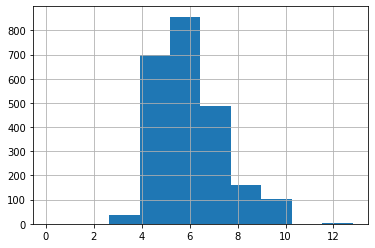

In [30]:
abv_hist = df.ABV.hist()
abv_hist

### We don't have ABV for all of the beers, how many are we missing them from?

- *Tip: You can use `isnull()` or `notnull()` to see where a column is missing data.*
- *Tip: You just want to count how many `True`s and `False`s there are.*
- *Tip: It's a weird trick involving something we usually use to count things in a column*

In [31]:
df.ABV.isnull().value_counts()

False    2348
True       68
Name: ABV, dtype: int64

# Looking at location

Brooklyn used to produce 80% of the country's beer! Let's see if it's still true.

In [58]:
df.Location.value_counts(normalize = True)

Grand Rapids, MI        0.027386
Chicago, IL             0.022822
Portland, OR            0.021577
Indianapolis, IN        0.017842
San Diego, CA           0.017427
Boulder, CO             0.017012
Denver, CO              0.016598
Brooklyn, NY            0.015768
Seattle, WA             0.014523
Longmont, CO            0.013693
San Francisco, CA       0.013278
Tampa, FL               0.012863
Stevens Point, WI       0.012448
Austin, TX              0.010373
Fort Collins, CO        0.009129
Cincinnati, OH          0.008714
Boston, MA              0.008714
Aurora, IN              0.008299
Saint Louis, MO         0.007884
Chandler, AZ            0.007884
Eagle, CO               0.007884
Boonville, CA           0.007469
Missoula, MT            0.007469
Davenport, IA           0.007469
Manhattan, KS           0.007469
Boise, ID               0.007054
Salt Lake City, UT      0.007054
Durango, CO             0.006639
Minneapolis, MN         0.006639
Astoria, OR             0.006639
          

## What are the top 10 cities in the US for canned craft beer?

In [33]:
df.Location.value_counts().head(10)

Grand Rapids, MI    66
Chicago, IL         55
Portland, OR        52
Indianapolis, IN    43
San Diego, CA       42
Boulder, CO         41
Denver, CO          40
Brooklyn, NY        38
Seattle, WA         35
Longmont, CO        33
Name: Location, dtype: int64

## List all of the beer from Brooklyn, NY

In [36]:
df_Brooklyn = df[df.Location == 'Brooklyn, NY']
df_Brooklyn

,Beer,Brewery,Location,Style,Size,ABV,IBUs
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.0,52
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.2,16
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.0,Does not apply
404,Nomader Weiss,Evil Twin Brewing,"Brooklyn, NY",Berliner Weissbier,12 oz.,4.0,Does not apply
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.2,7
439,Molotov Lite,Evil Twin Brewing,"Brooklyn, NY",American Double / Imperial IPA,16 oz.,8.5,Does not apply
588,Bengali,Sixpoint Craft Ales,"Brooklyn, NY",American IPA,"24 oz. ""Silo Can""",6.5,62
713,Sensi Harvest,Sixpoint Craft Ales,"Brooklyn, NY",American Pale Ale (APA),12 oz.,4.7,50
969,Hi-Res,Sixpoint Craft Ales,"Brooklyn, NY",American Double / Imperial IPA,12 oz.,9.9,111
987,KelSo Nut Brown Lager,KelSo Beer Company,"Brooklyn, NY",Euro Dark Lager,12 oz.,5.7,19


## What brewery in Brooklyn puts out the most cans of beer?

In [39]:
df_Brooklyn.Brewery.value_counts().head(1)

Sixpoint Craft Ales    24
Name: Brewery, dtype: int64

## What are the five most popular styles of beer produced by Sixpoint?

In [50]:
df_Sixpoint = df_Brooklyn[df.Brewery=='Sixpoint Craft Ales']
df_Sixpoint.Style.value_counts().head(6)
#printed six because so many are tied for second most popular

/Users/humeralodhi/.pyenv/versions/3.7.1/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


American IPA                      4
Baltic Porter                     2
German Pilsener                   2
Cream Ale                         2
American Double / Imperial IPA    2
Rye Beer                          2
Name: Style, dtype: int64

## List all of the breweries in New York state.

- *Tip: We want to match *part* of the `Location` column, but not all of it.*
- *Tip: Watch out for `NaN` values! You might be close, but you'll need to pass an extra parameter to make it work without an error.*

In [71]:
df[df.Location.str.contains('NY', na = False)].Brewery.value_counts()

Sixpoint Craft Ales              24
Matt Brewing Company             13
Brooklyn Brewery                  6
Evil Twin Brewing                 5
Blue Point Brewing Company        4
Butternuts Beer and Ale           4
The Bronx Brewery                 3
KelSo Beer Company                3
Upstate Brewing Company           2
Montauk Brewing Company           2
Chatham Brewing                   2
Bomb Beer Company                 2
Southampton Publick House         1
Newburgh Brewing Company          1
Dundee Brewing Company            1
The Manhattan Brewing Company     1
Name: Brewery, dtype: int64

### Now *count* all of the breweries in New York state

In [72]:
df[df.Location.str.contains('NY', na = False)].Brewery.value_counts().sum()

74

# Measuring International Bitterness Units

## Display all of the IPAs

Include American IPAs, Imperial IPAs, and anything else with "IPA in it."

IPA stands for [India Pale Ale](https://www.bonappetit.com/story/ipa-beer-styles), and is probably the most popular kind of beer in the US for people who are drinking [craft beer](https://www.craftbeer.com/beer/what-is-craft-beer).

In [74]:
df[df.Style.str.contains('IPA', na = False)]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.5,50
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.0,68
14,Rico Sauvin,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,7.6,68
17,Pile of Face,Against the Grain Brewery,"Louisville, KY",American IPA,16 oz.,6.0,65
24,Habitus (2014),Mike Hess Brewing Company,"San Diego, CA",American Double / Imperial IPA,16 oz.,8.0,100
25,Solis,Mike Hess Brewing Company,"San Diego, CA",American IPA,16 oz.,7.5,85
27,Habitus,Mike Hess Brewing Company,"San Diego, CA",American Double / Imperial IPA,16 oz.,8.0,100
33,Villager,Fort Point Beer Company,"San Francisco, CA",American IPA,12 oz.,6.3,42
38,HopArt,COAST Brewing Company,"Charleston, SC",American IPA,16 oz.,7.7,Does not apply
39,Boy King,COAST Brewing Company,"Charleston, SC",American Double / Imperial IPA,16 oz.,9.7,Does not apply


IPAs are usually pretty hoppy and bitter. IBU stands for [International Bitterness Unit](http://www.thebrewenthusiast.com/ibus/), and while a lot of places like to brag about having the most bitter beer (it's an American thing!), IBUs don't necessary *mean anything*.

Let's look at how different beers have different IBU measurements.

## Try to get the average IBU measurement across all beers

In [140]:
df.dtypes
df.IBUs.mean()

42.71316725978647

### Oh no, it doesn't work!

It looks like some of those values *aren't numbers*. There are two ways to fix this:

1. Do the `.replace` and `np.nan` thing we did in class. Then convert the column to a number. This is boring.
2. When you're reading in your csv, there [is an option called `na_values`](http://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.read_csv.html). You can give it a list of **numbers or strings to count as `NaN`**. It's a lot easier than doing the `np.nan` thing, although you'll need to go add it up top and run all of your cells again.

- *Tip: Make sure you're giving `na_values` a LIST, not just a string*

### Now try to get the average IBUs again

In [86]:
df = pd.read_csv("craftcans.csv",na_values=['Does not apply'])
df.IBUs.mean()

42.71316725978647

## Draw the distribution of IBU measurements, but with *twenty* bins instead of the default of 10

- *Tip: Every time I ask for a distribution, I'm looking for a histogram*
- *Tip: Use the `?` to get all of the options for building a histogram*
- *Tip: Make sure your `matplotlib` thing is set up right!*

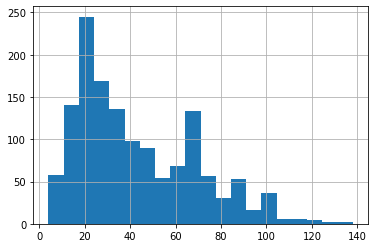

In [94]:
df.IBUs.hist(bins=20)

## Hm, Interesting distribution. List all of the beers with IBUs above the 75th percentile

- *Tip: There's a single that gives you the 25/50/75th percentile*
- *Tip: You can just manually type the number when you list those beers*

In [114]:
df.describe()

,IBUs
count,1405.000000
mean,42.713167
std,25.954066
min,4.000000
25%,21.000000
50%,35.000000
75%,64.000000
max,138.000000


In [119]:
df[df.IBUs>64].Style

6       American Double / Imperial IPA
7                   English Barleywine
14      American Double / Imperial IPA
17                        American IPA
21           American India Pale Lager
22           American India Pale Lager
24      American Double / Imperial IPA
25                        American IPA
27      American Double / Imperial IPA
46              Russian Imperial Stout
59                        American IPA
62                        American IPA
68              Russian Imperial Stout
69                            Rye Beer
79                        American IPA
89      American Double / Imperial IPA
93                        American IPA
110                       American IPA
123                       American IPA
149                       American IPA
168                       American IPA
170                       American IPA
178                       American IPA
182     American Double / Imperial IPA
186     American Double / Imperial IPA
192                      

## List all of the beers with IBUs below the 25th percentile

In [120]:
df[df.IBUs<25].Style

2                English Brown Ale
11                     Pumpkin Ale
12                Belgian Pale Ale
13                American Pilsner
18               English Brown Ale
19      Keller Bier / Zwickel Bier
20             American Pale Lager
26                       Wheat Ale
30         American Pale Wheat Ale
31        American Amber / Red Ale
32                          Kölsch
54             American Pale Lager
56              American Brown Ale
57             American Blonde Ale
66                 American Porter
67          Fruit / Vegetable Beer
85             American Blonde Ale
88                          Dubbel
90                 American Porter
102                American Porter
105                           Gose
106                German Pilsener
126              American Wild Ale
134         Saison / Farmhouse Ale
139                     Hefeweizen
144             Berliner Weissbier
145            American Blonde Ale
150             American Brown Ale
159             Berl

## List the median IBUs of each type of beer. Graph it.

Put the highest at the top, and the missing ones at the bottom.

- Tip: Look at the options for `sort_values` to figure out the `NaN` thing. The `?` probably won't help you here.

In [121]:
df.groupby(by='Style').IBUs.median().sort_values(ascending = False)

Style
American Barleywine                    96.0
Russian Imperial Stout                 94.0
American Double / Imperial IPA         91.0
American Double / Imperial Pilsner     85.0
American Black Ale                     73.0
Belgian Strong Dark Ale                72.0
American Strong Ale                    70.0
American IPA                           69.0
English Stout                          66.0
American India Pale Lager              65.0
Belgian IPA                            61.0
English Barleywine                     60.0
Rye Beer                               57.0
Baltic Porter                          52.0
English Strong Ale                     52.0
American Double / Imperial Stout       51.0
English India Pale Ale (IPA)           47.0
American White IPA                     45.0
American Pale Ale (APA)                44.0
Extra Special / Strong Bitter (ESB)    41.0
California Common / Steam Beer         41.0
Old Ale                                40.0
American Stout            

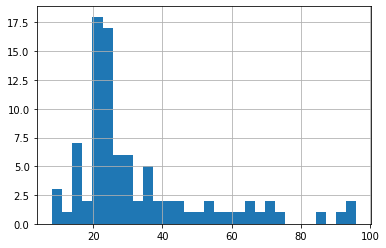

In [122]:
df.groupby(by='Style').IBUs.median().hist(bins=30)

## Hmmmm, it looks like they are generally different styles. What are the most common 5 styles of high-IBU beer vs. low-IBU beer?

- *Tip: You'll want to think about it in three pieces - filtering to only find the specific beers beers, then finding out what the most common styles are, then getting the top 5.*
- *Tip: You CANNOT do this in one command. It's going to be one command for the high and one for the low.*
- *Tip: "High IBU" means higher than 75th percentile, "Low IBU" is under 25th percentile*

In [128]:
df[df.IBUs<25].Style.value_counts().sort_values(ascending=False).head(5)

American Pale Wheat Ale     49
American Blonde Ale         46
Fruit / Vegetable Beer      30
American Amber / Red Ale    24
Witbier                     22
Name: Style, dtype: int64

In [129]:
df[df.IBUs>64].Style.value_counts().sort_values(ascending=False).head(5)

American IPA                      195
American Double / Imperial IPA     72
American Pale Ale (APA)            18
American Black Ale                 15
American Strong Ale                 9
Name: Style, dtype: int64

## Get the average IBU of "Witbier", "Hefeweizen" and "American Pale Wheat Ale" styles

I'm counting these as wheat beers. If you see any other wheat beer categories, feel free to include them. I want ONE measurement and ONE graph, not three separate ones. And 20 to 30 bins in the histogram, please.

- *Tip: I hope that `isin` is in your toolbox*

In [136]:
df_wheat = df[(df.Style=='Witbier')| (df.Style=="Hefeweizen") | (df.Style == 'American Pale Wheat Ale')]
df_wheat.IBUs.mean()

18.982142857142858

## Draw a histogram of the IBUs of those beers

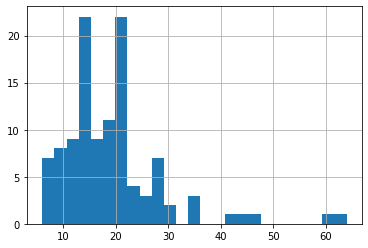

In [139]:
df_wheat.IBUs.hist(bins= 25)

## Get the average IBU of any style with "IPA" in it (also draw a histogram)

## Plot those two histograms on top of one another

To plot two plots on top of one another, you do two steps.

1. First, you make a plot using `plot` or `hist`, and you save it into a variable called `ax`.
2. You draw your second graph using `plot` or `hist`, and send `ax=ax` to it as a parameter.

It would look something like this:

```python
ax = df.plot(....)
df.plot(ax=ax, ....)
``` 

(...except totally different)

## Compare the ABV of wheat beers vs. IPAs : their IBUs were really different, but how about their alcohol percentage?

Wheat beers might include witbier, hefeweizen, American Pale Wheat Ale, and anything else you think is wheaty. IPAs probably have "IPA" in their name.

## Good work!

If you made it this far you deserve a drink.